In [1]:
import pandas as pd
import numpy as np
from scipy.stats import mode
low_memory=False

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [2]:
# Instalação do Plotly e do Cufflinks:
# O Cufflinks conecta o pandas ao Plotly:
!pip install cufflinks
!pip install plotly

In [3]:
# Importando os módulos:
import cufflinks as cf
from plotly.offline import iplot

In [25]:
total = pd.read_csv(r'caso_full.csv', sep=',')
cnes = pd.read_csv(r'cnes_beds.csv', sep=',')
impulso= pd.read_csv(r'impulso-caso-full.csv', sep=',')

In [5]:
total.reset_index(inplace=True)
total.dropna(inplace=True)

In [6]:
total.head()

,index,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,0,São Paulo,3550308.0,2020-02-25,9,12252023.0,False,False,1,0.00816,2020-02-25,0.0,0,1,city,SP,1,0
2,2,São Paulo,3550308.0,2020-02-26,9,12252023.0,False,False,1,0.00816,2020-02-26,0.0,0,2,city,SP,0,0
4,4,São Paulo,3550308.0,2020-02-27,9,12252023.0,False,False,1,0.00816,2020-02-27,0.0,0,3,city,SP,0,0
6,6,São Paulo,3550308.0,2020-02-28,9,12252023.0,False,False,2,0.01632,2020-02-28,0.0,0,4,city,SP,1,0
8,8,São Paulo,3550308.0,2020-02-29,9,12252023.0,False,False,2,0.01632,2020-02-29,0.0,0,5,city,SP,0,0


In [7]:
total.columns


Index(['index', 'city', 'city_ibge_code', 'date', 'epidemiological_week',
       'estimated_population_2019', 'is_last', 'is_repeated',
       'last_available_confirmed',
       'last_available_confirmed_per_100k_inhabitants', 'last_available_date',
       'last_available_death_rate', 'last_available_deaths', 'order_for_place',
       'place_type', 'state', 'new_confirmed', 'new_deaths'],
      dtype='object')

In [8]:
total['city_ibge_code'] =  total['city_ibge_code'].astype(np.int64)
total['date'] =pd.to_datetime(total.date)

total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580358 entries, 0 to 599511
Data columns (total 18 columns):
 #   Column                                         Non-Null Count   Dtype         
---  ------                                         --------------   -----         
 0   index                                          580358 non-null  int64         
 1   city                                           580358 non-null  object        
 2   city_ibge_code                                 580358 non-null  int64         
 3   date                                           580358 non-null  datetime64[ns]
 4   epidemiological_week                           580358 non-null  int64         
 5   estimated_population_2019                      580358 non-null  float64       
 6   is_last                                        580358 non-null  bool          
 7   is_repeated                                    580358 non-null  bool          
 8   last_available_confirmed                    

In [9]:
df_sjc =  total[total.city_ibge_code.eq(3549904)]
df_sjc.sort_values('date', ascending=True, inplace=True)

In [10]:
df_sjc.head()

,index,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
479,479,São José dos Campos,3549904,2020-03-18,12,721944.0,False,False,1,0.13851,2020-03-18,0.0,0,1,city,SP,1,0
591,591,São José dos Campos,3549904,2020-03-19,12,721944.0,False,True,1,0.13851,2020-03-18,0.0,0,2,city,SP,0,0
731,731,São José dos Campos,3549904,2020-03-20,12,721944.0,False,False,1,0.13851,2020-03-20,0.0,0,3,city,SP,0,0
899,899,São José dos Campos,3549904,2020-03-21,12,721944.0,False,True,1,0.13851,2020-03-20,0.0,0,4,city,SP,0,0
1080,1080,São José dos Campos,3549904,2020-03-22,13,721944.0,False,True,1,0.13851,2020-03-20,0.0,0,5,city,SP,0,0


<AxesSubplot:xlabel='date'>

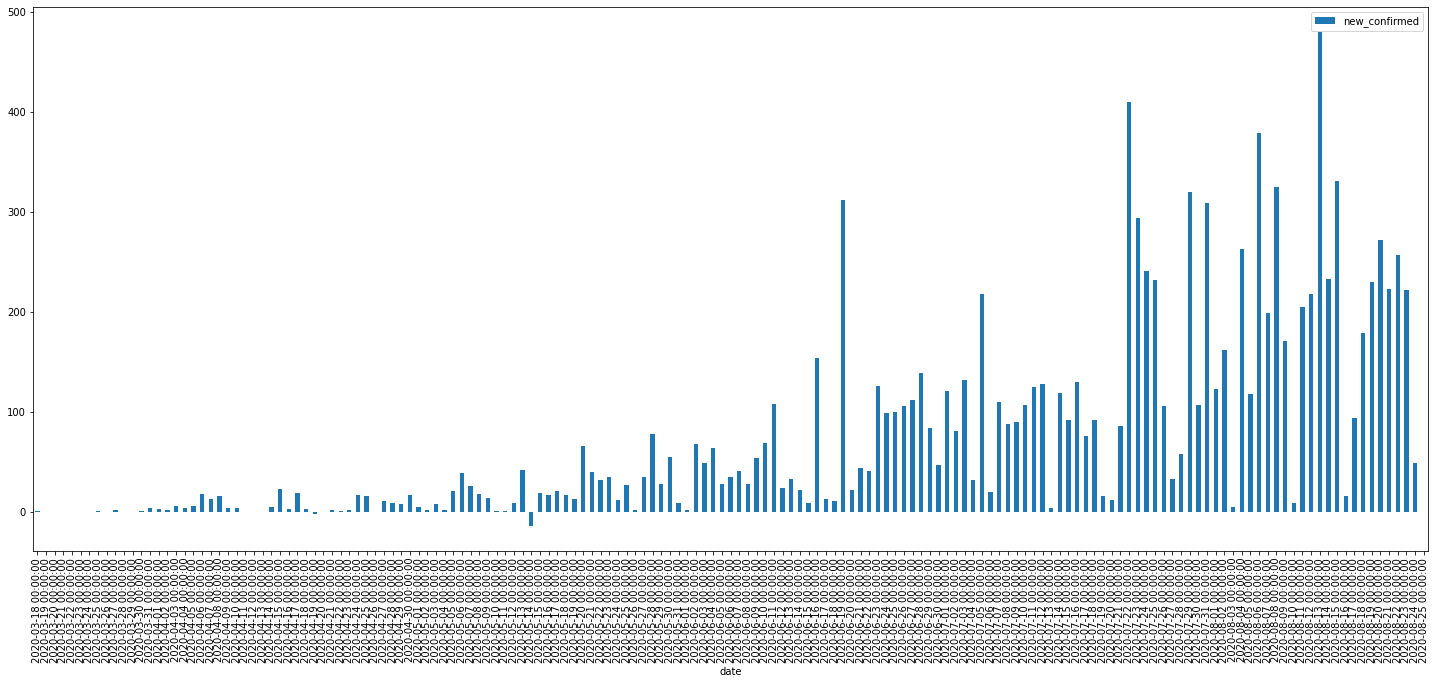

In [11]:
df_sjc.plot.bar(x='date', y='new_confirmed', figsize=(25,10))

<AxesSubplot:xlabel='date'>

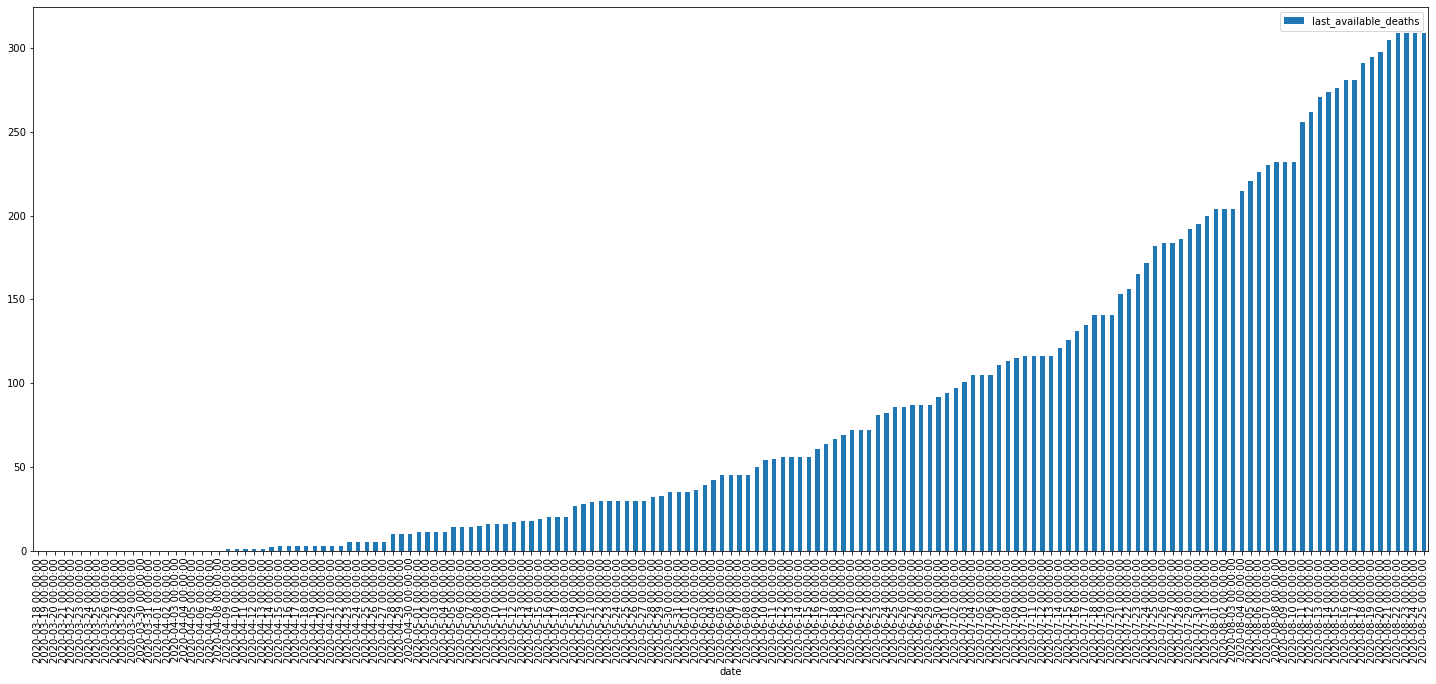

In [12]:
df_sjc.plot.bar(x='date', y='last_available_deaths', figsize=(25,10))

In [13]:
df_sjc

,index,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
479,479,São José dos Campos,3549904,2020-03-18,12,721944.0,False,False,1,0.13851,2020-03-18,0.0000,0,1,city,SP,1,0
591,591,São José dos Campos,3549904,2020-03-19,12,721944.0,False,True,1,0.13851,2020-03-18,0.0000,0,2,city,SP,0,0
731,731,São José dos Campos,3549904,2020-03-20,12,721944.0,False,False,1,0.13851,2020-03-20,0.0000,0,3,city,SP,0,0
899,899,São José dos Campos,3549904,2020-03-21,12,721944.0,False,True,1,0.13851,2020-03-20,0.0000,0,4,city,SP,0,0
1080,1080,São José dos Campos,3549904,2020-03-22,13,721944.0,False,True,1,0.13851,2020-03-20,0.0000,0,5,city,SP,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576989,576989,São José dos Campos,3549904,2020-08-21,34,721944.0,False,False,11167,1546.79587,2020-08-21,0.0273,305,157,city,SP,223,7
582563,582563,São José dos Campos,3549904,2020-08-22,34,721944.0,False,False,11424,1582.39420,2020-08-22,0.0270,309,158,city,SP,257,4
588138,588138,São José dos Campos,3549904,2020-08-23,35,721944.0,False,False,11646,1613.14451,2020-08-23,0.0265,309,159,city,SP,222,0
593714,593714,São José dos Campos,3549904,2020-08-24,35,721944.0,True,False,11695,1619.93174,2020-08-24,0.0264,309,160,city,SP,49,0


In [14]:
 cf.go_offline()

In [15]:
df_sjc.iplot(kind='scatter', x='date', y='last_available_deaths', title='Óbitos na cidade de São José dos Campos ao longo dos 5 meses da pandemia', color='red', mode='markers')

In [16]:
cnes.head()

,author_number_beds,author_number_icu_beds,author_number_ventilators,city_id,city_name,country_iso,country_name,data_last_refreshed,female,female-0-19,...,male-70-79,male-80>,number_beds,number_covid_icu_beds,number_icu_beds,number_ventilators,population,state_id,state_name,state_num_id
0,DataSUS,DataSUS,DataSUS,1200013,Acrelândia,BR,Brasil,2020-08-26 20:05:07,NaN,NaN,...,NaN,NaN,8,0,0,0,15256,AC,Acre,12
1,DataSUS,DataSUS,DataSUS,1200054,Assis Brasil,BR,Brasil,2020-08-26 20:05:07,NaN,NaN,...,NaN,NaN,7,0,0,0,7417,AC,Acre,12
2,DataSUS,DataSUS,DataSUS,1200104,Brasiléia,BR,Brasil,2020-08-26 20:05:07,NaN,NaN,...,NaN,NaN,16,14,0,0,26278,AC,Acre,12
3,DataSUS,DataSUS,DataSUS,1200138,Bujari,BR,Brasil,2020-08-26 20:05:07,NaN,NaN,...,NaN,NaN,0,0,0,0,10266,AC,Acre,12
4,DataSUS,DataSUS,DataSUS,1200179,Capixaba,BR,Brasil,2020-08-26 20:05:07,NaN,NaN,...,NaN,NaN,0,0,0,0,11733,AC,Acre,12


In [17]:
cnes_sjc =  cnes[cnes['city_name'] == 'São José dos Campos']

In [18]:
cnes_sjc

,author_number_beds,author_number_icu_beds,author_number_ventilators,city_id,city_name,country_iso,country_name,data_last_refreshed,female,female-0-19,...,male-70-79,male-80>,number_beds,number_covid_icu_beds,number_icu_beds,number_ventilators,population,state_id,state_name,state_num_id
5343,DataSUS,DataSUS,DataSUS,3549904,São José dos Campos,BR,Brasil,2020-08-26 20:05:07,NaN,NaN,...,NaN,NaN,925,16,190,381,721944,SP,São Paulo,35


In [52]:
impulso.tail()

,active_cases,city_id,city_name,city_notification_place_type,city_notification_rate,confirmed_cases,daily_cases,deaths,epidemiological_week,estimated_population_2019,...,new_deaths,notification_rate,order_for_place,place_type,state_id,state_name,state_notification_rate,state_num_id,data_last_refreshed,date
597934,22016.0,5300108,Brasília,city,1.0,129583.0,1434.0,2065.0,34,3015268.0,...,13.0,1.0,169,city,DF,Distrito Federal,1.0,53,2020-08-27 12:10:35,2020-08-25
597935,22698.0,5300108,Brasília,city,1.0,131253.0,1670.0,2082.0,35,3015268.0,...,17.0,1.0,170,city,DF,Distrito Federal,1.0,53,2020-08-27 12:10:35,2020-08-25
597936,21218.0,5300108,Brasília,city,1.0,132472.0,1219.0,2122.0,35,3015268.0,...,40.0,1.0,171,city,DF,Distrito Federal,1.0,53,2020-08-27 12:10:35,2020-08-25
597937,23044.0,5300108,Brasília,city,1.0,135423.0,2951.0,2148.0,35,3015268.0,...,26.0,1.0,172,city,DF,Distrito Federal,1.0,53,2020-08-27 12:10:35,2020-08-25
597938,21510.0,5300108,Brasília,city,1.0,135423.0,0.0,2148.0,35,3015268.0,...,0.0,1.0,173,city,DF,Distrito Federal,1.0,53,2020-08-27 12:10:35,2020-08-25


In [49]:
impulso.columns

Index(['active_cases', 'city_id', 'city_name', 'city_notification_place_type',
       'city_notification_rate', 'confirmed_cases', 'daily_cases', 'deaths',
       'epidemiological_week', 'estimated_population_2019', 'health_region_id',
       'health_region_name', 'health_region_notification_place_type',
       'health_region_notification_rate', 'infectious_period_cases', 'is_last',
       'is_repeated', 'last_available_confirmed_per_100k_inhabitants',
       'last_available_date', 'last_available_death_rate', 'last_updated',
       'new_deaths', 'notification_rate', 'order_for_place', 'place_type',
       'state_id', 'state_name', 'state_notification_rate', 'state_num_id',
       'data_last_refreshed', 'date'],
      dtype='object')

In [33]:
total.columns

Index(['city', 'city_ibge_code', 'date', 'epidemiological_week',
       'estimated_population_2019', 'is_last', 'is_repeated',
       'last_available_confirmed',
       'last_available_confirmed_per_100k_inhabitants', 'last_available_date',
       'last_available_death_rate', 'last_available_deaths', 'order_for_place',
       'place_type', 'state', 'new_confirmed', 'new_deaths'],
      dtype='object')

In [51]:
impulso_sjc =  impulso[impulso['city_name'] == 'São José dos Campos']

In [48]:
impulso_sjc.info

<bound method DataFrame.info of         active_cases  city_id            city_name  \
421485           1.0  3549904  São José dos Campos   
421486           1.0  3549904  São José dos Campos   
421487           1.0  3549904  São José dos Campos   
421488           1.0  3549904  São José dos Campos   
421489           1.0  3549904  São José dos Campos   
...              ...      ...                  ...   
421642        4004.0  3549904  São José dos Campos   
421643        4050.0  3549904  São José dos Campos   
421644        4083.0  3549904  São José dos Campos   
421645        4044.0  3549904  São José dos Campos   
421646        4136.0  3549904  São José dos Campos   

       city_notification_place_type  city_notification_rate  confirmed_cases  \
421485                          NaN                     NaN              1.0   
421486                          NaN                     NaN              1.0   
421487                          NaN                     NaN              1.0   

In [32]:
impulso['date'] = pd.to_datetime(total.date)

In [50]:
impulso.drop(columns=['date'])

,active_cases,city_id,city_name,city_notification_place_type,city_notification_rate,confirmed_cases,daily_cases,deaths,epidemiological_week,estimated_population_2019,...,last_updated,new_deaths,notification_rate,order_for_place,place_type,state_id,state_name,state_notification_rate,state_num_id,data_last_refreshed
0,11.0,1100015,Alta Floresta D'Oeste,health_region,NaN,1.0,1.0,0.0,18,22945.0,...,2020-05-02,0.0,0.091429,1,city,RO,Rondônia,0.715641,11,2020-08-27 12:10:35
1,10.0,1100015,Alta Floresta D'Oeste,health_region,NaN,1.0,0.0,0.0,19,22945.0,...,2020-05-03,0.0,0.097143,2,city,RO,Rondônia,0.684133,11,2020-08-27 12:10:35
2,9.0,1100015,Alta Floresta D'Oeste,health_region,NaN,1.0,0.0,0.0,19,22945.0,...,2020-05-04,0.0,0.108571,3,city,RO,Rondônia,0.645771,11,2020-08-27 12:10:35
3,8.0,1100015,Alta Floresta D'Oeste,health_region,NaN,1.0,0.0,0.0,19,22945.0,...,2020-05-05,0.0,0.131429,4,city,RO,Rondônia,0.612698,11,2020-08-27 12:10:35
4,6.0,1100015,Alta Floresta D'Oeste,health_region,NaN,1.0,0.0,0.0,19,22945.0,...,2020-05-06,0.0,0.162857,5,city,RO,Rondônia,0.605975,11,2020-08-27 12:10:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597934,22016.0,5300108,Brasília,city,1.0,129583.0,1434.0,2065.0,34,3015268.0,...,2020-08-22,13.0,1.000000,169,city,DF,Distrito Federal,1.000000,53,2020-08-27 12:10:35
597935,22698.0,5300108,Brasília,city,1.0,131253.0,1670.0,2082.0,35,3015268.0,...,2020-08-23,17.0,1.000000,170,city,DF,Distrito Federal,1.000000,53,2020-08-27 12:10:35
597936,21218.0,5300108,Brasília,city,1.0,132472.0,1219.0,2122.0,35,3015268.0,...,2020-08-24,40.0,1.000000,171,city,DF,Distrito Federal,1.000000,53,2020-08-27 12:10:35
597937,23044.0,5300108,Brasília,city,1.0,135423.0,2951.0,2148.0,35,3015268.0,...,2020-08-25,26.0,1.000000,172,city,DF,Distrito Federal,1.000000,53,2020-08-27 12:10:35
